<a href="https://colab.research.google.com/github/asrivasSW/AI-CLASS/blob/main/IA_taller2_corte2/Taller2_segundo_corte_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TALLER II SEGUNDO CORTE_IA

INTEGRANTES:
             

*   ANDRES STEVEN RIVAS SALAS
              
*   KEVIN JOSEPH VALBUENA PÉREZ

*   RUBEN DARIO BARAHONA

## Librerías a utilizar

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis, norm, uniform, chi2, expon, t, bernoulli, binom, poisson, kstest
from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_datasetestu = pd.read_excel('/content/drive/MyDrive/kaggle/Dataset_Estudiantes.xlsx')

## Puntos a realizar

### 1. Calcula el sesgo (skewness) y la curtosis (kurtosis) de la columna Nota.

In [ ]:
#Cargar dataset

df = df_datasetestu

In [ ]:
#Calcular Sesgo y Kurtosis
sesgo = skew(df['Notas'])
curtosis_val = kurtosis(df['Notas'])

In [ ]:
#Imprimir resultados
print("Sesgo:", sesgo)
print("Curtosis:", curtosis_val)

Sesgo: -0.24568369158663012
Curtosis: -1.1433391065973297


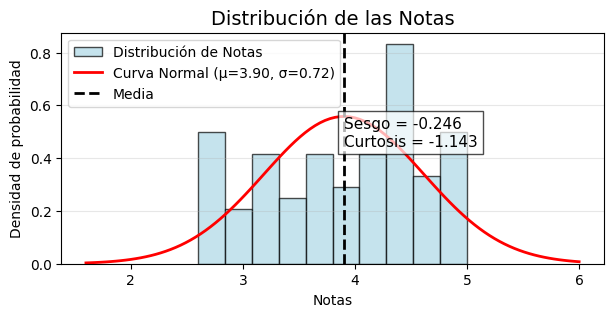

In [ ]:
#Graficar resultados

# Calcular media y desviación estándar
mu = df['Notas'].mean()
sigma = df['Notas'].std()

# Crear histograma con curva normal
plt.figure(figsize=(7,3))
count, bins, ignored = plt.hist(df['Notas'], bins=10, density=True, color='lightblue', edgecolor='black', alpha=0.7, label='Distribución de Notas')

# Curva normal teórica
x = np.linspace(min(df['Notas'])-1, max(df['Notas'])+1, 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', linewidth=2, label=f'Curva Normal (μ={mu:.2f}, σ={sigma:.2f})')

# Línea de la media
plt.axvline(mu, color='black', linestyle='--', linewidth=2, label='Media')

# Texto descriptivo de sesgo y curtosis
plt.text(mu, max(norm.pdf(x, mu, sigma))*0.8,
         f"Sesgo = {sesgo:.3f}\nCurtosis = {curtosis_val:.3f}",
         fontsize=11, bbox=dict(facecolor='white', alpha=0.7))

# Etiquetas y título
plt.title("Distribución de las Notas", fontsize=14)
plt.xlabel("Notas")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()


### **Interpretación:**

*   Si el sesgo > 0, la distribución es asimétrica a la derecha
*   Si sesgo < 0, es asimétrica a la izquierda.




* Curtosis > 0 indica una distribución más apuntada que la normal;
* Curtosis < 0, más plana.

<br>

Por lo cual se podría decir que estamos ante un grafico, donde el sesgo tiene una asimetría negativa, con una kurtosis platicúrtica.

<br>
<br>
<br>

### 2. Distribución normal y teoria del límite central.

<br>



In [4]:
# -----------------------------
# 1. Generamos una población no normal
# (por ejemplo, distribución uniforme entre 0 y 1)
# -----------------------------
poblacion = np.random.uniform(0, 1, 100000)

# -----------------------------
# 2. Calculamos varias medias muestrales
# para distintos tamaños de muestra
# -----------------------------
medias_5 = [np.mean(np.random.choice(poblacion, 5)) for _ in range(1000)]
medias_30 = [np.mean(np.random.choice(poblacion, 30)) for _ in range(1000)]
medias_100 = [np.mean(np.random.choice(poblacion, 100)) for _ in range(1000)]

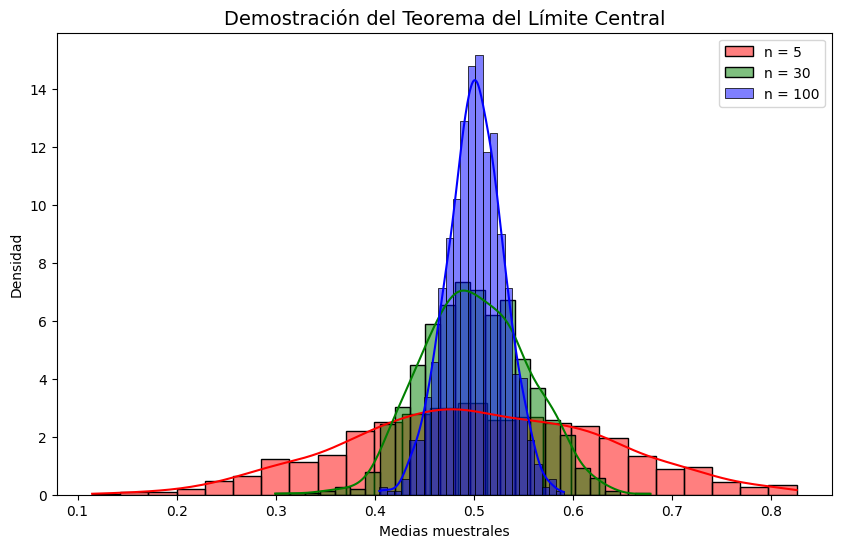

In [9]:
# -----------------------------
# 3. Visualizamos la evolución de la distribución de las medias
# -----------------------------
plt.figure(figsize=(10, 6))
sns.histplot(medias_5, color='red', label='n = 5', kde=True, stat="density", bins=25)
sns.histplot(medias_30, color='green', label='n = 30', kde=True, stat="density", bins=25)
sns.histplot(medias_100, color='blue', label='n = 100', kde=True, stat="density", bins=25)

plt.title("Demostración del Teorema del Límite Central", fontsize=14)
plt.xlabel("Medias muestrales")
plt.ylabel("Densidad")
plt.legend()
plt.show()

### **Interpretación**

El ejemplo demuestra el **Teorema del Límite Central**, el cual establece que, sin importar la forma de la distribución original de los datos (en este caso, uniforme), la **distribución de las medias muestrales** tiende a una **distribución normal** conforme el tamaño de la muestra aumenta.

Esto significa que, aunque la población no siga una distribución normal, las medias obtenidas de muchas muestras sí lo harán.  
Por esta razón, la **distribución normal se convierte en la base de la estadística inferencial**, permitiendo aplicar pruebas de hipótesis y estimaciones de intervalos con confianza, incluso cuando los datos originales no son normales, siempre que el tamaño muestral sea suficientemente grande.

<br>
<br>

### 3. Otras Distribuciones de Probabilidad

In [22]:
# reproducibilidad
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

# -----------------------------
# 1) Datos sintéticos — ejemplos de la vida real
# -----------------------------

# A) Exponencial (tiempos de espera entre clientes en minutos)
# Supongamos que en promedio llega 1 cliente cada 6 minutos -> rate = 1/6 per minute
scale_mean = 6.0             # media (1/lambda)
n_exp = 1000
tiempos_espera = rng.exponential(scale=scale_mean, size=n_exp)

# B) Poisson (número de correos recibidos por hora)
# Supongamos promedio de 4 correos por hora
lambda_emails = 4.0
n_poisson = 500
emails_por_hora = rng.poisson(lam=lambda_emails, size=n_poisson)

In [23]:
# -----------------------------
# 2) Resumen estadístico rápido
# -----------------------------
print("=== Resumen: Exponencial (tiempos de espera en minutos) ===")
print(f"N = {n_exp}, media empírica = {tiempos_espera.mean():.3f}, std = {tiempos_espera.std(ddof=1):.3f}")
print()
print("=== Resumen: Poisson (emails por hora) ===")
print(f"N = {n_poisson}, media empírica = {emails_por_hora.mean():.3f}, var empírica = {emails_por_hora.var(ddof=1):.3f}")


=== Resumen: Exponencial (tiempos de espera en minutos) ===
N = 1000, media empírica = 6.086, std = 6.166

=== Resumen: Poisson (emails por hora) ===
N = 500, media empírica = 3.984, var empírica = 3.775


In [26]:
# -----------------------------
# 3) Ajuste y test de bondad de ajuste
# -----------------------------

# A) Exponencial: estimamos scale (media empírica) y aplicamos Kolmogorov-Smirnov
scale_hat = tiempos_espera.mean()  # MLE para exponencial (con loc=0)
# K-S test contra exponencial con loc=0 y scale=scale_hat
stat_ks, p_ks = kstest(tiempos_espera, 'expon', args=(0, scale_hat))
print("\n--- Exponencial: Test K-S ---")
print(f"scale_hat = {scale_hat:.3f}, KS stat = {stat_ks:.4f}, p-value = {p_ks:.4f}")

# B) Poisson: estimamos lambda = media empírica y realizamos prueba chi-cuadrado de bondad de ajuste.
lambda_hat = emails_por_hora.mean()
obs_counts = np.bincount(emails_por_hora)  # cuenta de ocurrencias por k = 0,1,2,...
k_vals = np.arange(len(obs_counts))
expected_probs = poisson.pmf(k_vals, mu=lambda_hat)
expected_counts = expected_probs * n_poisson



--- Exponencial: Test K-S ---
scale_hat = 6.086, KS stat = 0.0180, p-value = 0.8967


In [27]:
# agrupar cola para asegurar esperados >= 5 (regla práctica)
# si hay bins con expected < 5, los combinamos hacia la cola derecha
obs = obs_counts.copy()
exp = expected_counts.copy()
# combinar desde el final mientras existan expected < 5
while len(exp) > 1 and np.any(exp < 5):
    # combinar último dos bins
    exp[-2] += exp[-1]
    obs[-2] += obs[-1]
    exp = exp[:-1]
    obs = obs[:-1]

chi_stat = ((obs - exp)**2 / exp).sum()
df_chi = len(exp) - 1 - 1  # restamos 1 por estimación de parámetro lambda
p_chi = 1 - chi2.cdf(chi_stat, df=df_chi)

print("\n--- Poisson: Chi-cuadrado de bondad de ajuste ---")
print(f"lambda_hat = {lambda_hat:.3f}")
print(f"chi2 = {chi_stat:.3f}, df = {df_chi}, p-value = {p_chi:.4f}")


--- Poisson: Chi-cuadrado de bondad de ajuste ---
lambda_hat = 3.984
chi2 = 7.639, df = 8, p-value = 0.4695


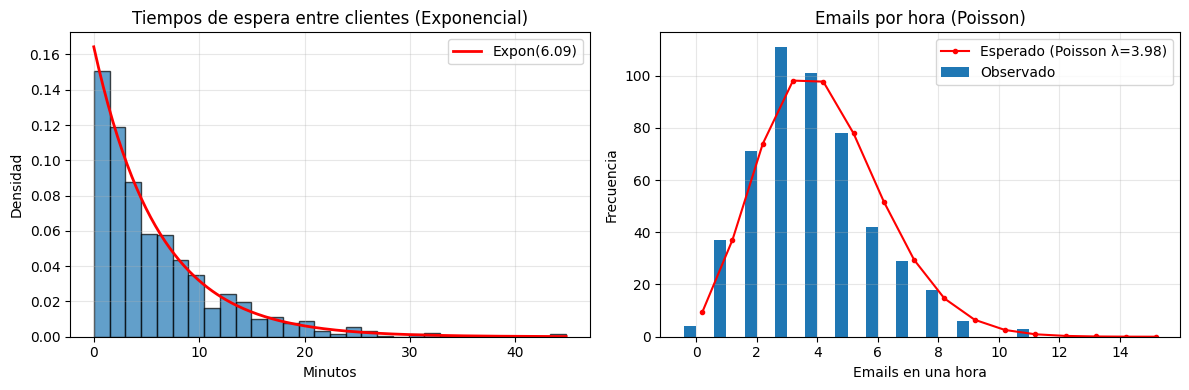

In [28]:
# -----------------------------
# 4) Visualizaciones
# -----------------------------

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Exponencial: histograma y curva teórica
ax = axes[0]
counts, bins, _ = ax.hist(tiempos_espera, bins=30, density=True, alpha=0.7, edgecolor='black')
x = np.linspace(0, tiempos_espera.max(), 200)
ax.plot(x, expon.pdf(x, 0, scale_hat), 'r-', lw=2, label=f'Expon({scale_hat:.2f})')
ax.set_title('Tiempos de espera entre clientes (Exponencial)')
ax.set_xlabel('Minutos')
ax.set_ylabel('Densidad')
ax.legend()
ax.grid(alpha=0.3)

# Poisson: barras observadas y curvas teóricas
ax = axes[1]
k_plot = np.arange(0, max(emails_por_hora.max(), 15) + 1)
ax.bar(k_plot - 0.2, np.bincount(emails_por_hora, minlength=len(k_plot)), width=0.4, label='Observado')
ax.plot(k_plot + 0.2, poisson.pmf(k_plot, mu=lambda_hat) * n_poisson, 'r.-', label=f'Esperado (Poisson λ={lambda_hat:.2f})')
ax.set_title('Emails por hora (Poisson)')
ax.set_xlabel('Emails en una hora')
ax.set_ylabel('Frecuencia')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [31]:
# -----------------------------
# 5) Outputs
# -----------------------------
resultados = {
    'exp_mean_emp': float(tiempos_espera.mean()),
    'exp_std_emp': float(tiempos_espera.std(ddof=1)),
    'exp_ks_stat': float(stat_ks),
    'exp_ks_pvalue': float(p_ks),
    'poisson_lambda_hat': float(lambda_hat),
    'poisson_chi2_stat': float(chi_stat),
    'poisson_chi2_pvalue': float(p_chi)
}
print("\nResultados:")
print(resultados)


Resultados:
{'exp_mean_emp': 6.086148600009337, 'exp_std_emp': 6.1656317495192114, 'exp_ks_stat': 0.01798901942477732, 'exp_ks_pvalue': 0.8967002231209049, 'poisson_lambda_hat': 3.984, 'poisson_chi2_stat': 7.638971028862942, 'poisson_chi2_pvalue': 0.4695065553021609}


### Interpretación:
**Ejemplo continuo — Exponencial (tiempos de espera entre clientes):**  

El histograma muestra una alta concentración de tiempos pequeños (clientes que llegan pronto uno tras otro) y una caída rápida en la frecuencia de tiempos largos, lo cual refleja la forma clásica de la distribución exponencial.  
<br>

**Ejemplo discreto — Poisson (emails por hora):**  

El gráfico de barras muestra que las frecuencias observadas en azul se alinean con las esperadas (curva roja) en torno a 4 correos por hora, validando el ajuste del modelo.  
<br>

Esto nos deduce que, ambos ejemplos muestran la aplicabilidad de las distribuciones continua y discreta en situaciones reales y cómo los métodos inferenciales permiten validar su ajuste mediante pruebas estadísticas.

En el caso de la **distribución exponencial**, los resultados confirman que los tiempos de espera entre llegadas de clientes se comportan de forma aleatoria e independiente, cumpliendo las propiedades teóricas del modelo.

Por otro lado, la **distribución de Poisson** refleja correctamente la cantidad promedio de correos recibidos por hora, mostrando un comportamiento estable y sin indicios de sobredispersión.

### 4. Toma las columnas Edad (variable independiente X) y Nota (variable dependiente Y), y realiza lo siguiente:  

<br>

* Ajusta una recta de regresión lineal y grafica los puntos observados junto con la recta estimada.
* Calcula los residuos y el RMSD (Root Mean Square Deviation).

In [ ]:
#Definir las variables para el modelo
X = df[['Edad']]
y = df['Notas']

#Crear y entrenar el modelo de regresión lineal
# Se crea una instancia del modelo y se ajusta con los datos
modelo = LinearRegression()
modelo.fit(X, y)

#Calcular las predicciones del modelo
# El modelo predice las notas estimadas (ŷ) para cada edad (x)
y_pred = modelo.predict(X)

#Calcular los residuos y medidas de ajuste
residuos = y - y_pred
rss = np.sum(residuos**2)
rmsd = np.sqrt(rss / (len(X) - 2))

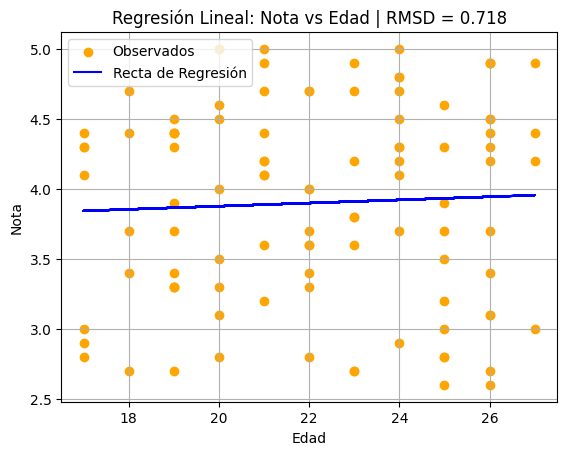

Pendiente (β₁): 0.011
Intercepto (β₀): 3.652
RMSD: 0.718


In [ ]:
#Resultados y grafico
plt.scatter(X, y, color='orange', label='Observados')
plt.plot(X, y_pred, color='blue', label='Recta de Regresión')
plt.xlabel('Edad')
plt.ylabel('Nota')
plt.title(f'Regresión Lineal: Nota vs Edad | RMSD = {rmsd:.3f}')
plt.legend()
plt.grid(True)
plt.show()

print(f"Pendiente (β₁): {modelo.coef_[0]:.3f}")
print(f"Intercepto (β₀): {modelo.intercept_:.3f}")
print(f"RMSD: {rmsd:.3f}")

### **Interpretación:**

Si la pendiente (β₁) es positiva, las notas tienden a aumentar con la edad.

Si es negativa, las notas tienden a disminuir.

El RMSD mide qué tan dispersos están los datos reales respecto a la recta del modelo.

Cuanto menor sea el RMSD, mejor es el ajuste del modelo.